In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('../../data processing/preprocessed.csv')
pd.set_option("display.max_columns", None)

In [3]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,False,6
145456,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,False,6
145457,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,False,6
145458,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False,6


In [4]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
y = df["RainTomorrow"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 7)

In [7]:
from tensorflow.keras import layers, models, optimizers, callbacks

# Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initializing the NN
model = models.Sequential()

model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=7))
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
opt = optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150


c:\python 3.9\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7799 - loss: 0.5831 - val_accuracy: 0.7823 - val_loss: 0.4471
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7854 - loss: 0.4644 - val_accuracy: 0.8242 - val_loss: 0.4361
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7954 - loss: 0.4568 - val_accuracy: 0.8237 - val_loss: 0.4312
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7990 - loss: 0.4464 - val_accuracy: 0.8254 - val_loss: 0.4263
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7998 - loss: 0.4428 - val_accuracy: 0.8238 - val_loss: 0.4232
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8014 - loss: 0.4376 - val_accuracy: 0.8228 - val_loss: 0.4212
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7970 - loss: 0.4430 - val_accuracy: 0.8221 - val_loss: 0.4200
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8036 - loss: 0.4349 - val_

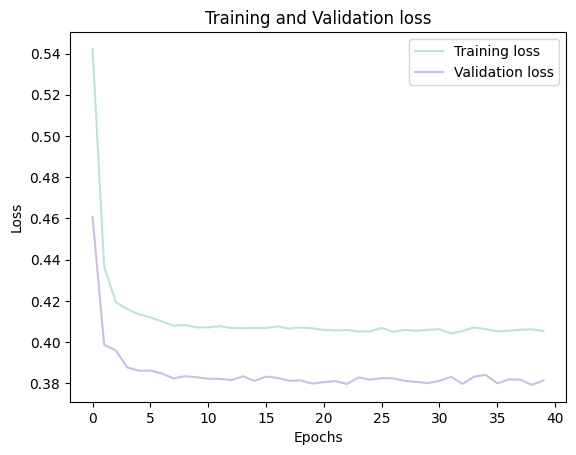

In [ ]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

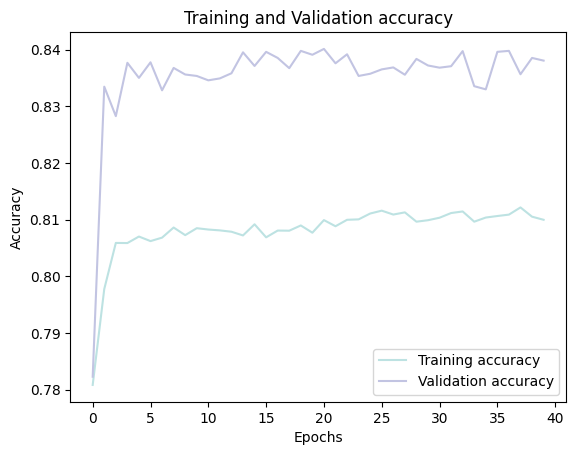

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step
              precision    recall  f1-score   support

       False       0.85      0.96      0.90     22672
        True       0.73      0.43      0.54      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092

